# CIFAR-10 CNN

CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html

O conjunto de dados CIFAR-10 possui 600000 imagens coloridas de dimensões $32\times 32$. Os dados são divididos em 10 casses com 6000 imagens por classe. 

O exemplo abaixo é uma adaptação do exemplo fornecido na documentação do Keras: 
https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py Nele, nós utilizamos apenas 3 das 10 classes. A saída das diferentes camadas da CNN são mostradas.

## Carregando e  mostrando os dados


X_train shape: (15000, 1, 32, 32)
15000 amostras de treinamento
3000 amostras de teste


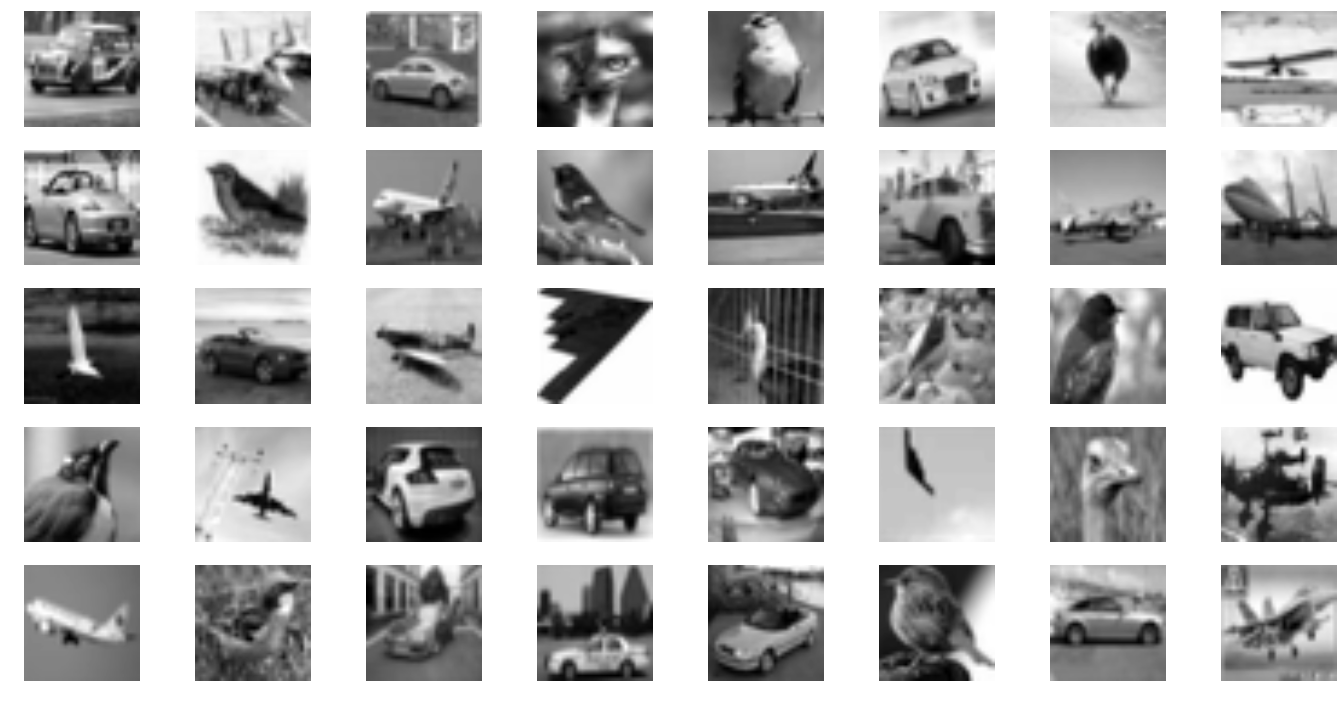

In [11]:
%matplotlib inline
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pylab as plt
import cv2
import numpy as np

batch_size = 100
nb_classes = 10
nb_epoch =  150#00
data_augmentation = True

# Dimensões das imagens
img_rows, img_cols = 32, 32
# Imagens RGB.
img_channels = 3

# varregando os dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.ravel()
y_test = y_test.ravel()


#Selecionando apenas objetos das classes: 0, 1, 2, 3
indexes_train = (y_train == 0) | (y_train == 1) | (y_train == 2)# | (y_train == 3)
X_train = X_train[indexes_train].mean(axis=1)[:,np.newaxis,:,:]
y_train = y_train[indexes_train]

indexes_test = (y_test == 0) | (y_test == 1) | (y_test == 2) # | (y_test == 3)
X_test = X_test[indexes_test].mean(axis=1)[:,np.newaxis,:,:]
y_test = y_test[indexes_test]

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'amostras de treinamento')
print(X_test.shape[0], 'amostras de teste')

#Mostrando algumas imagens do conjunto de teste
plt.figure(figsize=(24, 12))

for k, i in enumerate(np.random.choice(np.arange(0, len(y_test)), size=(40,))):
    plt.subplot(5, 8, k + 1)
    image = (X_test[i])#.transpose(1,2,0)
    image = cv2.resize(image[0], (96, 96), interpolation=cv2.INTER_LINEAR)
    #cv2.putText(image, str(y_test[i]), (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 
    #            (0, 255, 0), 2)
    # mostra as imagens
    plt.imshow(image,cmap = 'gray')
    plt.axis('off')
    
# Transforma o vetor de labes para o formato de one-hot encoding.
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Construíndo a CNN com o Keras

In [12]:
#Modelo sequencial
model = Sequential()

# Primeira convolução
conv1 = Convolution2D(3, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:])#32
model.add(conv1)
convout1 = Activation('relu') 
model.add(convout1)


# Primeiro Max-pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
maxpooling_out1 = Dropout(0.25)
model.add(maxpooling_out1)

# Segunda convolução
model.add(Convolution2D(6, 3, 3, border_mode='same'))
convout3 = Activation('relu') 
model.add(convout3)

# # Quarta convolução
# model.add(Convolution2D(64, 3, 3))
# convout4 = Activation('relu') 
# model.add(convout4)

# Segundo max-pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
maxpooling_out2 = Dropout(0.25)
model.add(maxpooling_out2)

# Camadas finais
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

if not data_augmentation:
    print('Sem aumento de dados.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)
else:
    print('Com aumento de dados.')
    # Pre-processamento e aumento de dados em tempo real:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # poe a media da entrada em 0 ao longo do dataset
        samplewise_center=False,  # poe a media de cada amostra em zero
        featurewise_std_normalization=False,  # normaliza pelo desvio padrão do dataset
        samplewise_std_normalization=False,  # normaliza pelo desvio padrão cada amostra
        zca_whitening=False,  # aplica "ZCA whitening"
        rotation_range=0,  # rotaciona as imagens aleatoriamente (0 a 180 graus)
        width_shift_range=0.1,  # aleatoriamente desloca a imagem horizontalmente (fração da largura)
        height_shift_range=0.1,  # aleatoriamente desloca a imagem certicalmente (fração da altura)
        horizontal_flip=True,  # espelha aleatoriamente as imagens na horizontal
        vertical_flip=False)  # espelha aleatoriamente as imagens na vertical

    # Cálcula os valores necessários para realizar a normalização por amostra
    # (desvio-padrão, Média, e componentes principais se for aplicado "ZCA whitening").
    datagen.fit(X_train)

    # Faz o treino do modelo nos batches gerados pelo datagen.flow().
    model.fit_generator(datagen.flow(X_train, Y_train,
                                     batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
validation_data=(X_test, Y_test))
print(model.summary())

Com aumento de dados.
Epoch 1/150
15000/15000 [==============================] - 6s - loss: 1.0594 - acc: 0.4547 - val_loss: 0.9316 - val_acc: 0.6093
Epoch 2/150
15000/15000 [==============================] - 6s - loss: 0.8327 - acc: 0.6305 - val_loss: 0.7674 - val_acc: 0.6400
Epoch 3/150
15000/15000 [==============================] - 6s - loss: 0.7413 - acc: 0.6780 - val_loss: 0.6749 - val_acc: 0.7017
Epoch 4/150
15000/15000 [==============================] - 6s - loss: 0.7103 - acc: 0.6973 - val_loss: 0.6778 - val_acc: 0.6917
Epoch 5/150
15000/15000 [==============================] - 6s - loss: 0.6880 - acc: 0.7105 - val_loss: 0.5856 - val_acc: 0.7553
Epoch 6/150
15000/15000 [==============================] - 6s - loss: 0.6555 - acc: 0.7211 - val_loss: 0.6175 - val_acc: 0.7327
Epoch 7/150
15000/15000 [==============================] - 6s - loss: 0.6407 - acc: 0.7270 - val_loss: 0.5616 - val_acc: 0.7600
Epoch 8/150
15000/15000 [==============================] - 6s - loss: 0.6254 - acc

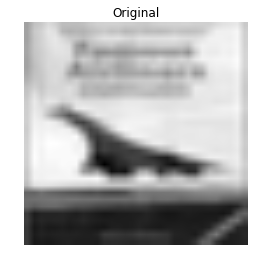

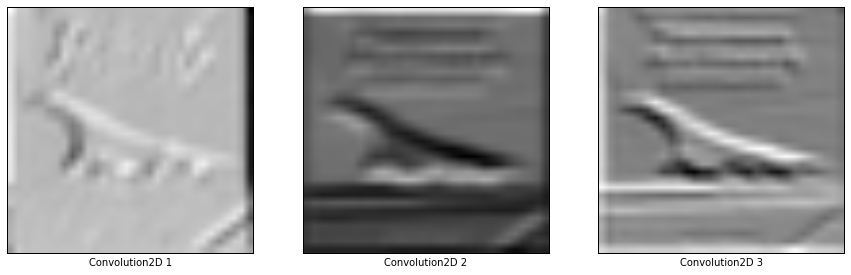

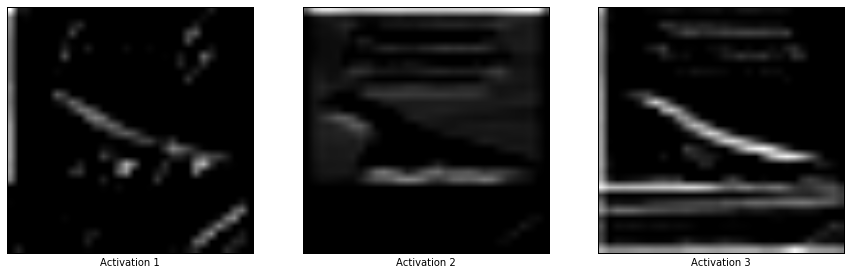

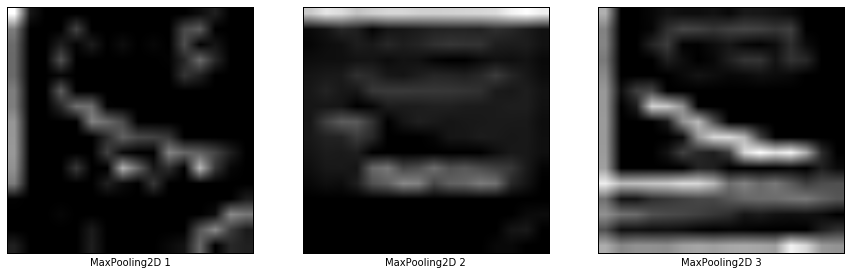

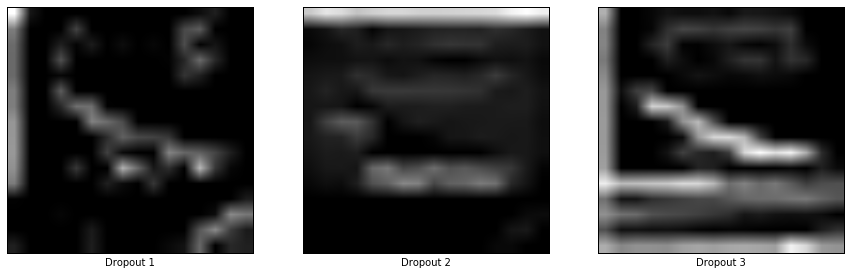

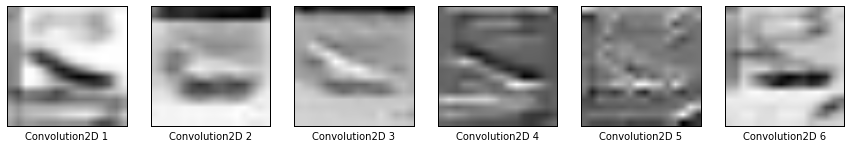

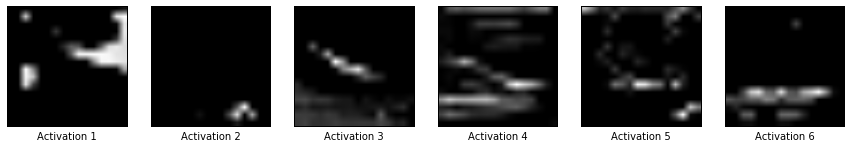

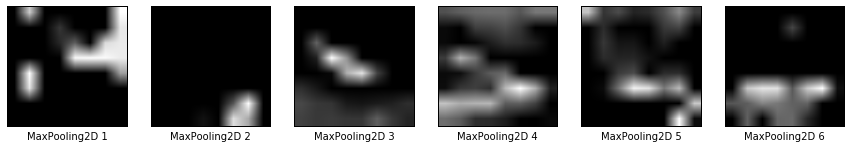

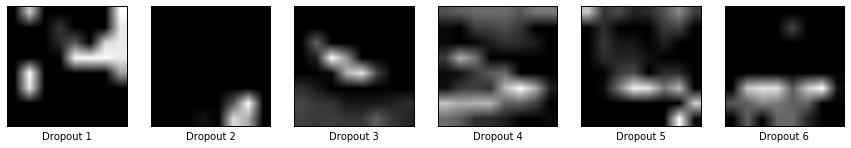

In [60]:
plt.figure()
plt.imshow(X_test[0,0,:,:],cmap = 'gray')
plt.axis('off')
plt.title("Original")
H,W = 15,45
for layer in model.layers[:-6]:
    intermediate_layer_model = Model(input=model.input,output=layer.output)
    intermediate_output = intermediate_layer_model.predict(X_test[0].reshape(1,1,32,32))
    sub_dim = intermediate_output.shape[1]
    counter = 1
    name = str(layer).split('.')[3].split(" ")[0]
    ncols = intermediate_output.shape[1]
    #if name == "MaxPooling2D":
    #    H = H/2
    #    W = W/2
    #if ncols == 6    
    fig =plt.figure(figsize=(H,W))
    
    for kk in xrange(intermediate_output.shape[1]):
        plt.subplot(1,sub_dim, counter)
        counter+=1
        aux = intermediate_output[0,kk,:,:]
        plt.imshow(aux,cmap ='gray')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(name + ' ' + str(kk+1))
    